In [1]:
import torch

Optimization: Gradient Descent
   - minimizing error function of linear model and we do until the model is fit for training data really very well

In [8]:
w = torch.tensor(3.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)

In [9]:
def forward(x):
    y = w*x +b
    return y

In [10]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [11]:
# many input
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [12]:
from torch.nn import Linear

In [13]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [15]:
x = torch.tensor([[2.0],[3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)

## Custom models

In [16]:
import torch.nn as nn

In [26]:
class LR(nn.Module):
    def __init__(self,input_size, output_size):
        super().__init__()
        self.linear= nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [27]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [29]:
x = torch.tensor([1.0])
model.forward(x)

tensor([0.0739], grad_fn=<AddBackward0>)

In [30]:
x = torch.tensor([[1.0],[2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

## Creating DataSet

In [52]:
import numpy as np
import matplotlib.pyplot as plt

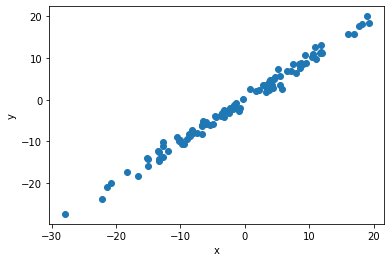

In [41]:
x = torch.randn(100,1)*10
y = x +torch.randn([100,1])
plt.plot(x.numpy(), y.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y');


In [42]:
class LR(nn.Module):
    def __init__(self,input_size, output_size):
        super().__init__()
        self.linear= nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [43]:
torch.manual_seed(1)
model = LR(1,1)


In [44]:
[w,b]=model.parameters()

In [47]:
w # 2 dim

Parameter containing:
tensor([[0.5153]], requires_grad=True)

In [48]:
b # 1 dim

Parameter containing:
tensor([-0.4414], requires_grad=True)

In [50]:
w1 = w[0][0].item()
b1 = b[0].item()
w1,b1

(0.5152631998062134, -0.44137823581695557)

In [55]:
def get_params():
    return (w[0][0].item(),b[0].item())

In [56]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30,30])
    y1 = w1*x1 +b1
    plt.plot(x1,y1,'r')
    plt.scatter(x,y)
    plt.show()

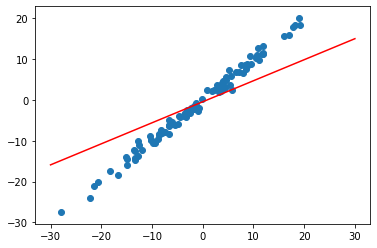

In [57]:
plot_fit('initial model')

The above graph shows that model doesn't fitted well so we will go for GD

## Loss Function
- Using GD

In [58]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [67]:
epochs = 1000
losses=[]
for i in range(epochs):
    y_pred = model.forward(x)
    loss= criterion(y_pred,y)
    print('epoch:',i,'loss: ', loss.item())
    losses.append(loss)
    loss.backward()
    optimizer.step()

epoch: 0 loss:  24.809059143066406
epoch: 1 loss:  23.010061264038086
epoch: 2 loss:  26.530479431152344
epoch: 3 loss:  21.32964515686035
epoch: 4 loss:  28.214733123779297
epoch: 5 loss:  19.639175415039062
epoch: 6 loss:  29.853208541870117
epoch: 7 loss:  17.952098846435547
epoch: 8 loss:  31.4449462890625
epoch: 9 loss:  16.288372039794922
epoch: 10 loss:  32.994529724121094
epoch: 11 loss:  14.671165466308594
epoch: 12 loss:  34.50776672363281
epoch: 13 loss:  13.122193336486816
epoch: 14 loss:  35.987548828125
epoch: 15 loss:  11.657732963562012
epoch: 16 loss:  37.43019104003906
epoch: 17 loss:  10.286023139953613
epoch: 18 loss:  38.82426834106445
epoch: 19 loss:  9.00707721710205
epoch: 20 loss:  40.15188217163086
epoch: 21 loss:  7.814952373504639
epoch: 22 loss:  41.391780853271484
epoch: 23 loss:  6.701815128326416
epoch: 24 loss:  42.52399444580078
epoch: 25 loss:  5.662275314331055
epoch: 26 loss:  43.533912658691406
epoch: 27 loss:  4.6969475746154785
epoch: 28 loss:  4

epoch: 314 loss:  4.39363956451416
epoch: 315 loss:  43.85407257080078
epoch: 316 loss:  5.3241400718688965
epoch: 317 loss:  42.8795051574707
epoch: 318 loss:  6.330621719360352
epoch: 319 loss:  41.780635833740234
epoch: 320 loss:  7.412469387054443
epoch: 321 loss:  40.5716438293457
epoch: 322 loss:  8.575104713439941
epoch: 323 loss:  39.272335052490234
epoch: 324 loss:  9.826547622680664
epoch: 325 loss:  37.903751373291016
epoch: 326 loss:  11.172924041748047
epoch: 327 loss:  36.48390197753906
epoch: 328 loss:  12.614519119262695
epoch: 329 loss:  35.024269104003906
epoch: 330 loss:  14.143455505371094
epoch: 331 loss:  33.52853012084961
epoch: 332 loss:  15.74376106262207
epoch: 333 loss:  31.993999481201172
epoch: 334 loss:  17.393871307373047
epoch: 335 loss:  30.414716720581055
epoch: 336 loss:  19.070701599121094
epoch: 337 loss:  28.786046981811523
epoch: 338 loss:  20.754179000854492
epoch: 339 loss:  27.108592987060547
epoch: 340 loss:  22.430749893188477
epoch: 341 loss

epoch: 652 loss:  2.6329636573791504
epoch: 653 loss:  45.745723724365234
epoch: 654 loss:  3.262505531311035
epoch: 655 loss:  44.998939514160156
epoch: 656 loss:  3.9876105785369873
epoch: 657 loss:  44.129486083984375
epoch: 658 loss:  4.817291259765625
epoch: 659 loss:  43.156158447265625
epoch: 660 loss:  5.761302471160889
epoch: 661 loss:  42.097476959228516
epoch: 662 loss:  6.825796127319336
epoch: 663 loss:  40.96735763549805
epoch: 664 loss:  8.009781837463379
epoch: 665 loss:  39.772708892822266
epoch: 666 loss:  9.303688049316406
epoch: 667 loss:  38.512969970703125
epoch: 668 loss:  10.690396308898926
epoch: 669 loss:  37.182342529296875
epoch: 670 loss:  12.148476600646973
epoch: 671 loss:  35.773658752441406
epoch: 672 loss:  13.656585693359375
epoch: 673 loss:  34.28288269042969
epoch: 674 loss:  15.197779655456543
epoch: 675 loss:  32.712623596191406
epoch: 676 loss:  16.762300491333008
epoch: 677 loss:  31.073871612548828
epoch: 678 loss:  18.348064422607422
epoch: 67

Text(0.5, 0, 'epoch')

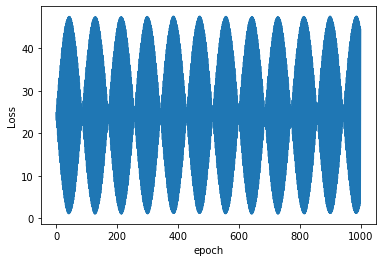

In [68]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

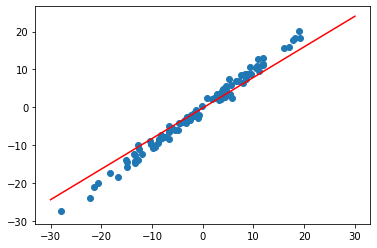

In [69]:
plot_fit('Train model')